In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# pd.set_option('display.max_rows', 100)

## Input data

In [2]:
DATA = '../data/'

In [3]:
paper_author = pd.read_csv(DATA+'all_papers_with_author.csv')
author_gender = pd.read_csv(DATA+'author_id_name_gender.csv')
author_gender2 = pd.read_csv(DATA+'author_id_name_gender_2.csv')
influenced_author_gender = pd.read_csv(DATA+'influenced_by_author_id_name_gender.csv')
influencer_author_gender = pd.read_csv(DATA+'influencer_author_id_name_gender.csv')

## Looking inside

In [4]:
paper_author.head()

,id,title,abstract,pub_date,pub_year,authors,citations,keyCitations,references,keyReferences,citationRate,citationAcceleration,fieldsOfStudy,search_term,first_name,author_id,full_name
0,2344630.0,Bitter to Better - How to Make Bitcoin a Bette...,Bitcoin is a distributed digital currency whic...,2012-02-27,2012,"{'name': 'Simon Barber', 'id': '38052503', 'fi...",307,37,12,0,49.333333,-0.322034,Computer Science,blockchain,Simon,38052503,Simon Barber
1,2344630.0,Bitter to Better - How to Make Bitcoin a Bette...,Bitcoin is a distributed digital currency whic...,2012-02-27,2012,"{'name': 'Xavier Boyen', 'id': '1681881', 'fir...",307,37,12,0,49.333333,-0.322034,Computer Science,blockchain,Xavier,1681881,Xavier Boyen
2,2344630.0,Bitter to Better - How to Make Bitcoin a Bette...,Bitcoin is a distributed digital currency whic...,2012-02-27,2012,"{'name': 'Elaine Shi', 'id': '1726246', 'first...",307,37,12,0,49.333333,-0.322034,Computer Science,blockchain,Elaine,1726246,Elaine Shi
3,2344630.0,Bitter to Better - How to Make Bitcoin a Bette...,Bitcoin is a distributed digital currency whic...,2012-02-27,2012,"{'name': 'Ersin Uzun', 'id': '2344630', 'first...",307,37,12,0,49.333333,-0.322034,Computer Science,blockchain,Ersin,2344630,Ersin Uzun
4,41219849.0,The spread of behavior in an online social net...,How do social networks affect the spread of be...,2010-09-03,2010,"{'name': 'Damon Centola', 'id': '41219849', 'f...",995,82,3,2,132.333333,-0.354610,Medicine||Computer Science,blockchain,Damon,41219849,Damon Centola


In [5]:
author_gender.head()

,first_name,author_id,full_name,is_initial,gender
0,Richard,1717841,Richard Szeliski,False,male
1,Arthur,48898002,Arthur D. Edelstein,False,male
2,Nenad,8610628,Nenad Amodaj,False,male
3,Karl,16207529,Karl Hoover,False,male
4,Ron,145127145,Ron D. Vale,False,male


In [6]:
influenced_author_gender.head()

,author_id,id,full_name,score,is_initial,gender
0,1726246,145645850,Ling Ren,411,False,andy
1,1726246,2012099,Christopher W. Fletcher,357,False,male
2,1726246,1736809,Kartik Nayak,299,False,unknown
3,1726246,2155148,Attila A. Yavuz,266,False,male
4,1726246,144568986,T.-H. Hubert Chan,247,False,unknown


In [7]:
influencer_author_gender.head()

,author_id,id,full_name,score,is_initial,gender
0,1726246,1748224,Rafail Ostrovsky,486,False,male
1,1726246,1752788,Dan Boneh,249,False,male
2,1726246,1679615,Michael T. Goodrich,246,False,male
3,1726246,145310230,Craig Gentry,238,False,male
4,1726246,1811683,Rafael Pass,230,False,male


In [8]:
# author_gender.groupby('gender').count()

In [9]:
len(paper_author)

12332

In [10]:
paper_author.groupby(['id']).count().sort_values(by=['title'], ascending=False)

,title,abstract,pub_date,pub_year,authors,citations,keyCitations,references,keyReferences,citationRate,citationAcceleration,fieldsOfStudy,search_term,first_name,author_id,full_name
id,,,,,,,,,,,,,,,,
2532812.0,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93
1712426.0,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76
1751762.0,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65
143653681.0,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51
49443290.0,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143975462.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
30769146.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2387394.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


## Paper totales

In [11]:
paper_author.groupby(['id']).count().sort_values(by=['title'], ascending=False)['title'].count()

2556

## Paper unicos

In [12]:
unique_papers = paper_author.groupby(['id']).count()[paper_author.groupby(['id']).count()['title'] == 1][['title']].rename(columns = {'title':'total'})

In [13]:
unique_papers.head()

,total
id,
1678747.0,1
1693631.0,1
1693663.0,1
1700031.0,1
1702328.0,1


In [14]:
len(unique_papers)

168

## Papers duplicados

In [15]:
duplicated_papers = paper_author.groupby(['id']).count()[paper_author.groupby(['id']).count()['title'] > 1][['title']].rename(columns = {'title':'total'}).sort_values(by='total', ascending=False)

In [16]:
duplicated_papers.head()

,total
id,
2532812.0,93
1712426.0,76
1751762.0,65
143653681.0,51
49443290.0,42


In [17]:
len(duplicated_papers)

2388

### ¿Qué data tiene el paper más repetido? -> 2532812

In [18]:
paper_author[(paper_author.id == 2532812)]

,id,title,abstract,pub_date,pub_year,authors,citations,keyCitations,references,keyReferences,citationRate,citationAcceleration,fieldsOfStudy,search_term,first_name,author_id,full_name
6548,2532812.0,EVpedia: a community web portal for extracellu...,MOTIVATION\r\nExtracellular vesicles (EVs) are...,2015-03-15,2015,"{'name': 'Dae-Kyum Kim', 'id': '2853930', 'fir...",139,7,50,2,31.333333,0.444444,Computer Science||Medicine||Engineering,Technology,Dae-Kyum,2853930,Dae-Kyum Kim
6549,2532812.0,EVpedia: a community web portal for extracellu...,MOTIVATION\r\nExtracellular vesicles (EVs) are...,2015-03-15,2015,"{'name': 'Sae Rom Kim', 'id': '2226184', 'firs...",139,7,50,2,31.333333,0.444444,Computer Science||Medicine||Engineering,Technology,Sae,2226184,Sae Rom Kim
6550,2532812.0,EVpedia: a community web portal for extracellu...,MOTIVATION\r\nExtracellular vesicles (EVs) are...,2015-03-15,2015,"{'name': 'Dong-Sic Choi', 'id': '40652568', 'f...",139,7,50,2,31.333333,0.444444,Computer Science||Medicine||Engineering,Technology,Dong-Sic,40652568,Dong-Sic Choi
6551,2532812.0,EVpedia: a community web portal for extracellu...,MOTIVATION\r\nExtracellular vesicles (EVs) are...,2015-03-15,2015,"{'name': 'Yae Jin Yoon', 'id': '148418515', 'f...",139,7,50,2,31.333333,0.444444,Computer Science||Medicine||Engineering,Technology,Yae,148418515,Yae Jin Yoon
6552,2532812.0,EVpedia: a community web portal for extracellu...,MOTIVATION\r\nExtracellular vesicles (EVs) are...,2015-03-15,2015,"{'name': 'Gyeongyun Go', 'id': '46404245', 'fi...",139,7,50,2,31.333333,0.444444,Computer Science||Medicine||Engineering,Technology,Gyeongyun,46404245,Gyeongyun Go
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6636,2532812.0,EVpedia: a community web portal for extracellu...,MOTIVATION\r\nExtracellular vesicles (EVs) are...,2015-03-15,2015,"{'name': 'Kenneth W. Witwer', 'id': '144144148...",139,7,50,2,31.333333,0.444444,Computer Science||Medicine||Engineering,Technology,Kenneth,144144148,Kenneth W. Witwer
6637,2532812.0,EVpedia: a community web portal for extracellu...,MOTIVATION\r\nExtracellular vesicles (EVs) are...,2015-03-15,2015,"{'name': 'María Yáñez-Mó', 'id': '1398355030',...",139,7,50,2,31.333333,0.444444,Computer Science||Medicine||Engineering,Technology,María,1398355030,María Yáñez-Mó
6638,2532812.0,EVpedia: a community web portal for extracellu...,MOTIVATION\r\nExtracellular vesicles (EVs) are...,2015-03-15,2015,"{'name': 'Hyewon Youn', 'id': '49845001', 'fir...",139,7,50,2,31.333333,0.444444,Computer Science||Medicine||Engineering,Technology,Hyewon,49845001,Hyewon Youn
6639,2532812.0,EVpedia: a community web portal for extracellu...,MOTIVATION\r\nExtracellular vesicles (EVs) are...,2015-03-15,2015,"{'name': 'Reinhard Zeidler', 'id': '145347475'...",139,7,50,2,31.333333,0.444444,Computer Science||Medicine||Engineering,Technology,Reinhard,145347475,Reinhard Zeidler


In [19]:
paper_author[(paper_author.id == 2532812)].iloc[0,:]['authors']

"{'name': 'Dae-Kyum Kim', 'id': '2853930', 'first_name': 'Dae-Kyum', 'url_name': 'Dae-Kyum-Kim'}"

In [20]:
paper_author[(paper_author.id == 2532812)].authors

6548    {'name': 'Dae-Kyum Kim', 'id': '2853930', 'fir...
6549    {'name': 'Sae Rom Kim', 'id': '2226184', 'firs...
6550    {'name': 'Dong-Sic Choi', 'id': '40652568', 'f...
6551    {'name': 'Yae Jin Yoon', 'id': '148418515', 'f...
6552    {'name': 'Gyeongyun Go', 'id': '46404245', 'fi...
                              ...                        
6636    {'name': 'Kenneth W. Witwer', 'id': '144144148...
6637    {'name': 'María Yáñez-Mó', 'id': '1398355030',...
6638    {'name': 'Hyewon Youn', 'id': '49845001', 'fir...
6639    {'name': 'Reinhard Zeidler', 'id': '145347475'...
6640    {'name': 'Yong Song Gho', 'id': '2532812', 'fi...
Name: authors, Length: 93, dtype: object

### Los papers se encuentran repetidos en base a la cantidad de autores que se encuentran en ellos. El orden de los autores, responde al orden de la publicacion
https://www.semanticscholar.org/paper/EVpedia%3A-a-community-web-portal-for-extracellular-Kim-Lee/d6bdca65c9920b5a78a8e52d440119930f408158
https://www.ncbi.nlm.nih.gov/pubmed/25388151

In [21]:
paper_author.head()

,id,title,abstract,pub_date,pub_year,authors,citations,keyCitations,references,keyReferences,citationRate,citationAcceleration,fieldsOfStudy,search_term,first_name,author_id,full_name
0,2344630.0,Bitter to Better - How to Make Bitcoin a Bette...,Bitcoin is a distributed digital currency whic...,2012-02-27,2012,"{'name': 'Simon Barber', 'id': '38052503', 'fi...",307,37,12,0,49.333333,-0.322034,Computer Science,blockchain,Simon,38052503,Simon Barber
1,2344630.0,Bitter to Better - How to Make Bitcoin a Bette...,Bitcoin is a distributed digital currency whic...,2012-02-27,2012,"{'name': 'Xavier Boyen', 'id': '1681881', 'fir...",307,37,12,0,49.333333,-0.322034,Computer Science,blockchain,Xavier,1681881,Xavier Boyen
2,2344630.0,Bitter to Better - How to Make Bitcoin a Bette...,Bitcoin is a distributed digital currency whic...,2012-02-27,2012,"{'name': 'Elaine Shi', 'id': '1726246', 'first...",307,37,12,0,49.333333,-0.322034,Computer Science,blockchain,Elaine,1726246,Elaine Shi
3,2344630.0,Bitter to Better - How to Make Bitcoin a Bette...,Bitcoin is a distributed digital currency whic...,2012-02-27,2012,"{'name': 'Ersin Uzun', 'id': '2344630', 'first...",307,37,12,0,49.333333,-0.322034,Computer Science,blockchain,Ersin,2344630,Ersin Uzun
4,41219849.0,The spread of behavior in an online social net...,How do social networks affect the spread of be...,2010-09-03,2010,"{'name': 'Damon Centola', 'id': '41219849', 'f...",995,82,3,2,132.333333,-0.354610,Medicine||Computer Science,blockchain,Damon,41219849,Damon Centola


## Papers con id igual a author_id

In [22]:
same_id_author_id = paper_author[paper_author['id'] == paper_author['author_id']]

In [23]:
same_id_author_id.head()

,id,title,abstract,pub_date,pub_year,authors,citations,keyCitations,references,keyReferences,citationRate,citationAcceleration,fieldsOfStudy,search_term,first_name,author_id,full_name
3,2344630.0,Bitter to Better - How to Make Bitcoin a Bette...,Bitcoin is a distributed digital currency whic...,2012-02-27,2012,"{'name': 'Ersin Uzun', 'id': '2344630', 'first...",307,37,12,0,49.333333,-0.322034,Computer Science,blockchain,Ersin,2344630,Ersin Uzun
4,41219849.0,The spread of behavior in an online social net...,How do social networks affect the spread of be...,2010-09-03,2010,"{'name': 'Damon Centola', 'id': '41219849', 'f...",995,82,3,2,132.333333,-0.354610,Medicine||Computer Science,blockchain,Damon,41219849,Damon Centola
9,1730156.0,PowerGraph: Distributed Graph-Parallel Computa...,Large-scale graph-structured computation is ce...,2012-10-08,2012,"{'name': 'Carlos Guestrin', 'id': '1730156', '...",1128,368,39,1,184.666667,-0.189744,Computer Science,blockchain,Carlos,1730156,Carlos Guestrin
15,2348906.0,Soot: a Java bytecode optimization framework,"This paper presents Soot, a framework for opti...",2010-11-01,2010,"{'name': 'Vijay Sundaresan', 'id': '2348906', ...",726,159,25,6,95.333333,-0.307692,Computer Science,blockchain,Vijay,2348906,Vijay Sundaresan
22,1695217.0,Path ORAM: An Extremely Simple Oblivious RAM P...,"We present Path ORAM, an extremely simple Obli...",2012-02-23,2012,"{'name': 'Srinivas Devadas', 'id': '1695217', ...",516,173,15,0,95.666667,-0.022472,Computer Science,blockchain,Srinivas,1695217,Srinivas Devadas


In [24]:
len(same_id_author_id)

2908

In [25]:
same_id_author_id.groupby(['id', 'author_id', 'search_term']).count()

title  abstract  pub_date  pub_year  \
id           author_id  search_term                                             
1.678311e+06 1678311    blockchain            1         1         1         1   
                        performance           1         1         1         1   
1.678747e+06 1678747    algorithm             1         1         1         1   
1.678950e+06 1678950    computer              1         1         1         1   
1.679177e+06 1679177    model                 1         1         1         1   
...                                         ...       ...       ...       ...   
1.409191e+09 1409191033 machine learning      1         1         1         1   
1.409508e+09 1409507871 architecture          1         1         1         1   
1.409886e+09 1409886375 computer              1         1         1         1   
1.412114e+09 1412114084 machine learning      1         1         1         1   
1.412809e+09 1412809450 blockchain            1         1         1         1   

                                          authors  citations  keyCitations  \
id           author_id  search_term                                          
1.678311e+06 1678311    blockchain              1          1             1   
                        performance             1          1             1   
1.678747e+06 1678747    algorithm               1          1             1   
1.678950e+06 1678950    computer                1          1             1   
1.679177e+06 1679177    model                   1          1             1   
...                                           ...        ...           ...   
1.409191e+09 1409191033 machine learning        1          1             1   
1.409508e+09 1409507871 architecture            1          1             1   
1.409886e+09 1409886375 computer                1          1             1   
1.412114e+09 1412114084 machine learning        1          1             1   
1.412809e+09 1412809450 blockchain              1          1             1   

                                          references  keyReferences  \
id           author_id  search_term                                   
1.678311e+06 1678311    blockchain                 1              1   
                        performance                1              1   
1.678747e+06 1678747    algorithm                  1              1   
1.678950e+06 1678950    computer                   1              1   
1.679177e+06 1679177    model                      1              1   
...                                              ...            ...   
1.409191e+09 1409191033 machine learning           1              1   
1.409508e+09 1409507871 architecture               1              1   
1.409886e+09 1409886375 computer                   1              1   
1.412114e+09 1412114084 machine learning           1              1   
1.412809e+09 1412809450 blockchain                 1              1   

                                          citationRate  citationAcceleration  \
id           author_id  search_term                                            
1.678311e+06 1678311    blockchain                   1                     1   
                        performance                  1                     1   
1.678747e+06 1678747    algorithm                    1                     1   
1.678950e+06 1678950    computer                     1                     1   
1.679177e+06 1679177    model                        1                     1   
...                                                ...                   ...   
1.409191e+09 1409191033 machine learning             1                     1   
1.409508e+09 1409507871 architecture                 1                     1   
1.409886e+09 1409886375 computer                     1                     1   
1.412114e+09 1412114084 machine learning             1                     1   
1.412809e+09 1412809450 blockchain                   1                     1   

        

## Creo df con paper - search_term

In [26]:
paper_search_term = paper_author[['id', 'search_term']].drop_duplicates().sort_values(by=(['id', 'search_term']))

In [27]:
paper_search_term.head()

,id,search_term
2904,1678311.0,blockchain
9892,1678311.0,performance
1051,1678747.0,algorithm
806,1678950.0,computer
4454,1679177.0,model


In [28]:
len(paper_search_term)

2751

In [29]:
paper_search_term.to_csv(DATA+'paper_search_term')

## Creo df con paper - author_id - rank (en base al orden en el que aparecen en el paper)

In [30]:
paper_author_rank = paper_author[['id', 'author_id']]

In [31]:
paper_author_rank.head()

,id,author_id
0,2344630.0,38052503
1,2344630.0,1681881
2,2344630.0,1726246
3,2344630.0,2344630
4,41219849.0,41219849


In [32]:
len(paper_author_rank)

12332

In [33]:
paper_author_rank['rank'] = paper_author_rank.groupby(['id'])['author_id'].cumcount()+1

C:\Users\Claudio\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
paper_author_rank.to_csv(DATA+'paper_author_rank.csv')

## Creo nuevo archivo author_id_name_gender_2.csv

In [35]:
import gender_guesser.detector as gender

In [36]:
def is_initial(name):
    return len(name) < 4 and '.' in name

In [37]:
d = gender.Detector(case_sensitive=False)

In [38]:
authors_to_genderize = paper_author[['author_id', 'first_name']].drop_duplicates()

In [39]:
len(authors_to_genderize)

10590

### Elimino 1 registro con first_name NaN

In [40]:
authors_to_genderize[~authors_to_genderize['first_name'].isnull()]

,author_id,first_name
0,38052503,Simon
1,1681881,Xavier
2,1726246,Elaine
3,2344630,Ersin
4,41219849,Damon
...,...,...
12326,46348878,Dong
12328,1741549,Gergely
12329,143808510,Anders
12330,145810673,Vicenç


In [41]:
authors_to_genderize = authors_to_genderize[~authors_to_genderize['first_name'].isnull()]

In [42]:
len(author_gender)

68105

In [43]:
authors_to_genderize['is_initial'] = authors_to_genderize.first_name.apply(is_initial)

In [44]:
authors_to_genderize['gender'] = authors_to_genderize.first_name.apply(lambda x: d.get_gender(x))

In [45]:
authors_to_genderize.head()

,author_id,first_name,is_initial,gender
0,38052503,Simon,False,male
1,1681881,Xavier,False,male
2,1726246,Elaine,False,female
3,2344630,Ersin,False,male
4,41219849,Damon,False,male


In [46]:
authors_to_genderize.to_csv(DATA+'author_id_name_gender_2.csv')

## Pregunta 1: ¿Qué participación tienen las mujeres en general?


### Elimino duplicados de author_gender2 por las dudas (author_gender tiene duplicados, author_gender2 NO tiene)

In [47]:
author_gender2 = author_gender2.drop_duplicates()

In [48]:
len(author_gender2)

10589

### Mergeo con papers con genero

In [49]:
paper_author_gender = paper_author.merge(author_gender2[['author_id', 'is_initial', 'gender']], on='author_id', how='left')

In [50]:
len(paper_author_gender)

12332

In [52]:
len(paper_author_gender[paper_author_gender['gender'].isna()])

1

In [98]:
paper_author_gender_groupped = paper_author_gender.groupby('gender').count()[['id']].rename({'id':'total'})

In [99]:
paper_author_gender_groupped

,id
gender,
andy,2189
female,1094
male,6429
mostly_female,81
mostly_male,333
unknown,2205


In [100]:
undefined_gender = ['andy', 'unknown']

In [101]:
undefined_total = paper_author_gender_groupped[paper_author_gender_groupped.index.get_level_values(0).isin(undefined_gender)].values.sum()
undefined_total

4394

In [102]:
paper_author_gender_groupped = paper_author_gender_groupped[~(paper_author_gender_groupped.index.get_level_values(0).isin(undefined_gender))]

In [103]:
paper_author_gender_groupped

,id
gender,
female,1094
male,6429
mostly_female,81
mostly_male,333


In [114]:
s = {'undefined': 4394}

In [ ]:
undefined_total.name 

In [118]:
paper_author_gender_groupped

,id
gender,
female,1094
male,6429
mostly_female,81
mostly_male,333


In [109]:
paper_author_gender_groupped.add('undefined', axis=0, fill_value=None, level=0) 

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U21'), dtype('<U21')) -> dtype('<U21')

In [86]:
paper_author_gender_groupped['undefined'] = undefined_total

NameError: name 'undefined_total' is not defined

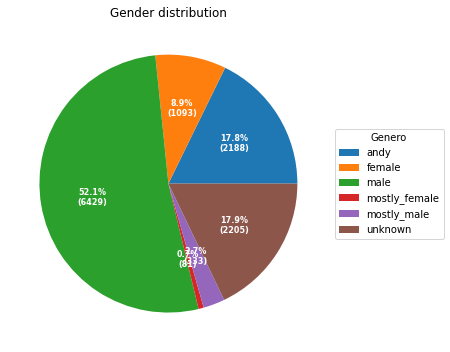

In [75]:
fig, ax = plt.subplots(figsize=(10, 5), subplot_kw=dict(aspect="equal"))
data = paper_author_gender_groupped.id.values.tolist()
gender = paper_author_gender_groupped.index.get_level_values(0).values.tolist()

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, gender,
          title="Genero",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Gender distribution")

plt.show()

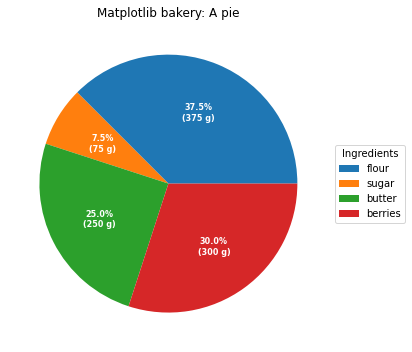

In [73]:
plt.rcParams["figure.figsize"] = (20,3)

fig, ax = plt.subplots(figsize=(10, 5), subplot_kw=dict(aspect="equal"))

recipe = ["375 g flour",
          "75 g sugar",
          "250 g butter",
          "300 g berries"]

data = [float(x.split()[0]) for x in recipe]
ingredients = [x.split()[-1] for x in recipe]


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, ingredients,
          title="Ingredients",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Matplotlib bakery: A pie")

plt.show()